# Identification of Magical Creatures
## Part  0: Getting and Cleaning Data
### Simon Nash
These notebooks will explore diferent deep learning tequniques as applied to a fairly small multilabel classification dataset. Each creature card in Magic: The Gathering has one or more "creature types". It is also generally true that the artwork on the card depicts the creature described in the dataset.
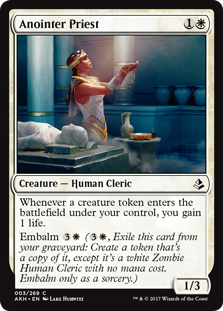
As a basic first exploration, we will be exploring a varriety of ways to map the image to the creature types, showing the advantages and pitfalls of a few different approaches one could take to the problem. But before we can do that, we need a dataset.If you'd like to skip to the hype part, feel free to skip this notebook.

### Getting a Card List
We could take a few different approaches here. Since we are just building a static dataset, using an api like https://docs.magicthegathering.io/ is kind of overkill (though it would also be a legitimate option). Later we will be scraping the images from http://gatherer.wizards.com, so we could plan to grab the rules text while we are there. However that would invovle some additional parsing, organization, and would ultimatly add some unessicary complexity to the task. We will go the simpilest route, and just grab json cardlist from https://mtgjson.com/.

In [1]:
# Import basic dependinces for processing the cardlist, and scrapping card images off the site.
import pandas as pd
import numpy as np

import json
from pandas.io.json import json_normalize    
import urllib
import os
import cStringIO
import matplotlib.pyplot as plt
%matplotlib inline
all_sets = pd.read_json("AllSetsArray.json")
with open('AllSetsArray.json') as all_sets_file:    
    all_sets = json.load(all_sets_file)
all_cards = json_normalize(all_sets, 'cards',record_prefix='cards_')

### Pruning the Card List
This is way more than we need for the task. For the particular task of identifying creature types based on card image, we can throw away everything that isn't a card with a creature type

In [2]:
def is_creature_card (card_types):
    # Some of the 'cards' in the database are actually tokens. These have a type "NaN", so "in" will throw and error if we try to check if "Creature" iss in "NaN".
    # Make sure this doesn't happen
    if type(card_types)==list:
        return 'Creature' in card_types
    else:
        return False
creature_cards = all_cards.loc[map(lambda x: is_creature_card(x), list(all_cards["cards_types"].values))]



### Grabbing the Images

In [ ]:
import sys,os
sys.path.append(os.path.realpath('..'))

for card in creature_cards["cards_multiverseid"].values:
    if not np.isnan(card):
        card_id = str(int(card))
        try:
            url = 'http://gatherer.wizards.com/Handlers/Image.ashx?multiverseid=' + str(card_id) + '&type=card'
            file_name = card_id + '.jpg'
            filename_and_path = os.path.join('/home/simon/MTGComputerVision/CardImages', file_name)
            image = urllib.URLopener()
            image.retrieve(url, filename_and_path)
            print(("Card with multiverse id " + card_id + " retrived."))
        except:
            print(("Card with multiverse id " + card_id + " could not be retrived."))


### Seperating by Frame Type and Cropping

In [3]:
import cv2
import glob
image_list = []
for card in creature_cards["cards_multiverseid"].values:
    if not np.isnan(card):
        card_id = str(int(card))
        print card_id
        im= cv2.imread('CardImages/'+ card_id + '.jpg')
        cv2.imwrite('Cropped_Images/' + card_id +'_cropped.png',im[35:165, 25:195])

439390
439391
439392
439613
439614
439615
439394
439395
439398
439399
439400
439401
439625
439626
439627
439628
439629
439402
439405
439406
439407
439408
439409
439411
439414
439416
439417
439418
439419
439421
439423
439424
439426
439428
439430
439622
439623
439624
439431
439432
439433
439435
439436
439439
439440
439442
439443
439616
439617
439618
439445
439447
439448
439449
439450
439451
439453
439455
439456
439650
439651
439652
439653
439654
439457
439458
439460
439461
439464
439465
439467
439468
439470
439471
439630
439631
439632
439633
439634
439472
439473
439475
439477
439478
439480
439481
439482
439483
439484
439487
439610
439611
439612
439488
439490
439492
439619
439620
439621
439495
439496
439497
439499
439500
439501
439503
439504
439505
439506
439509
439510
439511
439512
439513
439514
439515
439516
439519
439521
439523
439524
439526
439527
439528
439529
439532
439534
439655
439656
439657
439537
439541
439544
439546
439550
439551
439553
73977
74244
74220
74354
73944
74348
73950

397856
397733
397774
397808
397898
397778
397852
397796
397810
397827
397710
397872
397838
397893
397669
397736
397769
397865
397708
397772
397702
397743
159321
159743
159253
159816
159824
159175
159846
159149
159819
159188
159309
159153
159314
159245
159318
159087
159129
159232
159233
159268
159241
159822
159219
159845
159137
159775
159820
159202
159208
159728
159817
159123
159171
159145
159126
159156
159837
159132
159764
159821
159265
159193
159200
159086
159139
159141
159770
159173
159730
159229
159758
159759
159259
159262
159237
159773
159117
159315
159274
159742
159844
159205
159142
159226
159228
159093
159127
159212
159130
159312
159270
159246
159765
159224
159275
159196
159766
159109
159294
159834
159298
159301
159096
159097
159256
159841
159116
159098
159103
159119
159248
221493
221987
221112
202435
220946
202436
202489
221577
202561
202473
221567
202568
202583
221569
202577
221639
221985
233300
221988
202554
221565
228263
202498
202458
221111
221566
202546
202522
221498
221517

394373
394374
394379
394382
394385
394389
394393
394401
394409
394415
394416
394375
394386
394394
394403
394404
394411
394369
394390
394391
394356
394381
394384
394392
394406
394407
394383
386380
386319
386331
386341
386309
386324
386327
386318
386325
386326
386337
386364
386346
386305
386339
386354
386316
386363
386355
386302
386312
386307
386314
386336
386379
386366
386344
386347
386310
386338
386370
386300
386329
386342
386313
386376
386367
386322
380269
380245
380219
380263
380256
380210
380275
380233
380247
380202
380241
380252
380215
380228
380257
380272
380197
380206
380243
380250
380212
380195
380207
380262
380268
380260
380244
380242
380189
380226
380248
380196
380230
380265
380254
380200
380249
380193
380273
380224
380236
380205
373379
373385
373388
373353
373367
373342
373391
373395
373402
373376
373396
373415
373364
373371
373336
373338
373384
373399
373350
373377
373340
373339
373383
373416
373409
373398
373373
373363
373366
373345
373393
373390
373394
373413
368503
368481

433042
433044
433045
433047
433048
433052
433053
433055
433058
433061
433062
433067
433068
433070
433072
433073
433074
433075
433076
433085
433091
433093
433095
433096
433097
433100
433102
433103
433104
433105
433106
433107
433108
433109
433112
433115
433116
433117
433118
433119
433120
433121
433123
433124
433125
433126
433128
433129
433130
433132
433133
433157
420620
420621
420624
420625
420631
420633
420636
420637
420640
420642
420643
420645
420646
420647
420649
420650
420651
420652
420653
420654
420656
420657
420658
420659
420660
420662
420663
420665
420666
420667
420668
420671
420674
420675
420680
420682
420685
420686
420687
420691
420693
420697
420698
420699
420702
420703
420706
420707
420709
420717
420719
420720
420723
420725
420727
420729
420732
420733
420735
420736
420741
420742
420744
420745
420746
420747
420750
420751
420752
420761
420764
420767
420768
420771
420774
420775
420777
420779
420781
420782
420783
420786
420788
420789
420790
420791
420792
420793
420795
420798
420800

5719
5753
5837
10682
9849
5772
5863
5575
5671
5815
9722
5745
7167
5661
8907
5825
5636
5737
5597
5567
5620
5555
5852
5860
5654
5606
5591
8804
5625
5652
9724
9720
8803
5627
5851
5573
5751
5849
5780
5688
5861
5836
5546
5734
9700
5568
5541
9851
8824
5653
5701
5543
5760
8806
5666
5586
5826
5569
5660
5562
5759
5739
5657
5565
5590
5679
5865
5867
5603
5736
5686
5862
5769
5747
5577
5762
9678
5552
5724
5665
5738
5774
8820
5683
9710
5664
5823
5838
5866
5681
8826
5850
10659
8815
5700
9847
5550
8865
8871
8834
12354
12353
12813
12356
12955
5704
12368
12364
12814
12355
12387
12390
12372
11588
12389
12382
12580
12381
12369
12371
12380
12370
12400
12404
9699
12946
12392
12697
12696
12614
12940
12393
5703
9840
12418
12411
12815
12475
12643
13001
9689
12412
12423
12948
12419
12424
12410
12462
12435
12458
12950
12436
12440
12427
12428
9723
12430
12438
12656
12429
5571
12504
8896
12625
12647
15138
15125
15762
15765
15121
15124
15874
15123
14485
15769
18287
15132
15131
15120
15261
15146
15148
15783
15145
15

409855
409856
409858
409860
409861
409864
409865
409866
409867
409868
409869
409872
409874
409875
409877
409878
409880
409881
409882
409883
409886
409887
409890
409892
409893
409896
409897
409898
409900
409901
409906
409907
409909
409910
409911
409912
409913
409915
409916
409918
409919
409920
409922
409923
409924
409926
409929
409930
409933
409934
409936
409938
409943
409946
409947
409948
409949
409952
409953
409954
409959
409960
409961
409962
409965
409966
409967
409968
409969
409970
409971
409973
409974
409975
409976
409977
409978
409980
409982
409983
409984
409987
409988
409991
409992
409993
409994
409995
409996
409997
409999
410002
410003
410005
410010
410013
410014
410015
410019
410021
410028
410033
410034
410036
410037
410050
141929
142045
135451
159413
158695
158238
158690
146007
153310
141930
142003
147394
152060
146090
153985
146043
158763
141981
142005
158685
147370
157876
146036
147406
153319
152059
154402
146094
141957
142060
142051
135439
142034
146051
146002
153964
146095

398604
398667
398439
398606
398422
398616
398576
398493
398590
398681
398598
398537
398426
398453
398449
398461
398579
398430
398458
398514
398636
398409
398419
398546
398609
398554
398501
398460
398676
398450
398634
398482
398456
398438
398644
398668
398531
398663
398650
398626
398651
398445
398568
398447
398469
398511
398424
398660
398527
398635
398672
398653
398657
398521
398489
398655
398661
398665
398581
398585
398509
398553
398572
398620
398467
398643
401452
401454
401455
401457
401461
401462
401463
401464
401466
401467
39882
40131
39520
39430
19680
39702
40653
39425
39523
39717
39705
8785
39711
41133
39872
39743
39718
34410
39423
39712
39715
39716
39432
39420
39602
39509
39839
39517
39861
39732
39596
39879
39606
39515
41024
39530
39419
39932
25879
40655
39620
39533
40060
39527
41149
39595
29714
39884
39437
40578
39436
39529
39525
39619
39441
39526
39516
39539
39848
39887
39727
25812
40601
39440
39445
39706
39862
40101
26715
43638
39906
39547
39545
39851
39467
41134
39549
39644
1

383376
383387
383420
383433
383439
383440
383443
383182
383190
383195
383198
383245
383246
383247
383254
383257
383258
383259
383266
383293
383294
383295
383314
383337
383367
383372
383381
383390
383413
383416
383431
383184
383200
383205
383229
383255
383267
383268
383279
383290
383301
383325
383336
383344
383359
383364
383368
383371
383377
383382
383392
383406
383423
383426
383434
383442
383385
383197
383250
383289
383334
383343
383373
383388
383438
383160
383171
383167
383168
383170
383174
383164
383172
383162
383165
383173
370750
370789
370627
370793
370624
370801
370821
370768
370721
370786
370792
370770
370708
370765
370813
370620
370602
370704
370587
370597
370777
370720
370697
370688
370753
370632
370622
370685
370667
370747
370590
370638
370762
370807
370760
370650
370651
370617
370736
370692
370690
370815
370809
370810
370811
370761
370698
370758
370823
370800
370775
370772
370682
370723
370740
370683
370689
370705
370724
370746
370655
370752
370606
370702
370709
370619
370735

386584
386588
386602
386622
386634
386646
386670
386677
386694
386707
386708
386730
386463
386469
386476
386477
386480
386483
386486
386501
386504
386505
386529
386556
386562
386569
386580
386589
386597
386616
386628
386631
386632
386644
386647
386651
386664
386666
386671
386679
386681
386716
386731
386728
417575
417576
417577
417579
417582
417584
417585
417586
417589
417590
417591
417594
417595
417597
417601
417603
417604
417605
417606
417607
417608
417610
417612
417615
417619
417621
417623
417624
417626
417627
417630
417631
417632
417639
417640
417641
417642
417643
417644
417645
417646
417647
417650
417652
417655
417656
417657
417659
417663
417664
417668
417669
417670
417671
417674
417675
417678
417679
417680
417685
417693
417694
417696
417697
417698
417699
417701
417702
417703
417705
417706
417707
417709
417710
417711
417712
417715
417716
417717
417720
417722
417724
417727
417728
417729
417730
417732
417734
417738
417739
417740
417741
417742
417744
417745
417746
417748
417749
417750

391921
391932
391945
391788
391795
391800
391806
391850
391855
391875
391876
391879
391888
391890
391898
391922
391923
391928
391930
391937
391947
391787
391803
391817
391833
391834
391845
391846
391856
391857
391868
391874
391917
391920
391925
391951
391782
391783
391786
391789
391792
391794
391801
391818
391831
391839
391913
391942
391943
391954
391957
391958
391965
391796
391825
391866
391889
391924
391853
391893
391949
1838
1839
1840
1841
1842
1843
1844
1845
1847
1848
1853
1854
1855
1856
1857
1858
1859
1860
1861
1862
1863
1864
1866
1868
1871
1875
1876
1877
1878
1879
1881
1882
1883
1888
1889
1890
1895
1896
1897
1898
1899
1900
1901
1902
1903
1908
1909
1910
1911
1912
1913
1914
1915
1923
1924
1925
1926
1927
1928
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1943
1944
1945
1946
1947
1948
1949
1950
1960
1961
1962
1963
1964
1965
1966
1967
1968
1970
1971
1972
1973
1975
1976
1977
1978
1979
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
200

80413
80417
80415
78691
78691
75285
78693
78855
50345
80509
79166
79113
75258
75262
80522
78966
79088
78602
78854
80278
77921
50311
78962
50445
82423
50253
79112
79857
80521
78678
78678
50512
78679
78679
50431
79119
79237
77922
78965
77920
80520
50432
75277
50338
78694
78694
77919
75399
50383
79248
78968
85106
76638
79214
80508
50285
78192
77139
78688
78688
79195
50321
78964
75267
78986
78984
50266
50262
79242
50318
79140
79253
80274
80283
78687
78687
50305
80524
80511
50236
77138
78684
80282
50247
80525
79198
76634
50342
50488
80288
75247
76641
78976
50261
50487
78975
78975
50319
50308
75403
75367
80254
50510
80256
78853
79177
78989
50438
78979
82001
26654
26653
26625
27247
26657
26627
26638
26619
26608
27262
26642
27266
26660
27564
27253
27254
26607
26656
27261
26615
26655
26620
26626
26624
26605
27257
27258
26622
26646
26633
27265
27249
26640
27250
27227
26609
27256
26661
26614
27260
26611
27271
26631
26628
26606
26617
11177
11380
15391
21098
21105
21106
21107
21108
21109
21110
2111

423831
423833
423834
423839
423841
423842
423844
423847
423848
423849
423850
425694
425700
82992
84522
82999
84508
84057
83007
83962
83042
84608
83107
83123
82978
83461
83416
84533
83162
83163
83192
82951
82967
83244
87346
83246
87347
83254
83412
84112
83286
83441
84622
83311
84122
82988
82994
82998
84071
83084
83525
83165
82942
83258
83087
83096
83125
84612
82968
83158
83200
83215
83985
83249
83282
84141
83298
82980
83301
84561
83334
83010
83011
83420
83061
83157
84682
83102
84064
83114
84590
84505
83433
83354
83154
83155
84104
83464
84663
83185
83186
84393
83205
83222
83418
83235
83247
84688
83364
83273
83292
83411
84579
82991
84072
83001
84456
84124
84120
84540
83374
83109
83111
83018
82957
83305
83120
82955
83346
83150
83448
83173
83190
83193
83218
83973
84478
83236
84054
83410
83259
84502
83323
83421
83276
82950
83040
82960
84661
83069
83072
83451
83074
83977
83105
83115
84127
83128
83175
83440
83099
83152
83515
83161
83188
82943
83022
83151
84530
83272
84098
83463
83303
84665
844

### Dealing with Duplicates
With the full card image, we could imagine a foolproof method of creature type identification by applying ocr to the creature type line. So we are going to crop to just the image box.
A second danger comes from the fact that different printings of the same card have different multiverse ids. This is what allowed us to map each multiverse id to an image, but it also means we almost certainly have duplicate images in our dataset, this means we could end up with the same datapoint in any combination of train, validation, and test sets.  We could just throw away all reprintings, but then we would lose reprintings with different art.
#### Approach 1: Leave them in, but seperate train/validation/test by card id rather than multiverse id.
##### Pros
* Doesn't require more cleaning.
* Frequently used artwork could be considered a more cannonical representation of the creature type depicted on the card, so giving it extra weight would be justified.

##### Cons
* Reprintings with different artwork might be extra valuable to split between train, validation, and test, since they will help the identifier be robust to different settings and cultures depicted in different magic sets.
* Will save time on cleaning, but require more careful attention to be paid to validation.

In [23]:
creature_cards.loc[np.invert(np.isnan(creature_cards["cards_multiverseid"]))]

,cards_artist,cards_border,cards_cmc,cards_colorIdentity,cards_colors,cards_flavor,cards_hand,cards_id,cards_imageName,cards_layout,...,cards_starter,cards_subtypes,cards_supertypes,cards_text,cards_timeshifted,cards_toughness,cards_type,cards_types,cards_variations,cards_watermark
0,Andrea Radeck,NaN,1.0,[W],[White],NaN,NaN,95ebdf85f4ea74d584dfdfb72e3de5001d0748a9,adorable kitten,normal,...,NaN,[Cat],NaN,"When this creature enters the battlefield, rol...",NaN,1,Host Creature — Cat,"[Host, Creature]",NaN,NaN
1,Carl Critchlow,NaN,4.0,[W],[White],NaN,NaN,9bf93829d5f697e3d6324c439a932804bdfdec3f,aerial toastmaster,normal,...,NaN,"[Cyborg, Rigger]",NaN,"Flying\n{3}{W}, Sacrifice another artifact: Ae...",NaN,2,Artifact Creature — Cyborg Rigger,"[Artifact, Creature]",NaN,Order of the Widget
2,McLean Kendree,NaN,2.0,[W],[White],And thus at Maze's End\nthe runners end their ...,NaN,be5620e0c33888cebfcc16cc8f8638a9a5d0012f,amateur auteur1,normal,...,NaN,[Human],NaN,Sacrifice Amateur Auteur: Destroy target encha...,NaN,2,Creature — Human,[Creature],"[439613, 439614, 439615]",NaN
3,McLean Kendree,NaN,2.0,[W],[White],"So Griselbrand was bound,\nhis rage brought to...",NaN,b4b1553f73f2aa2cc8f9c89be34ea40d891f490f,amateur auteur3,normal,...,NaN,[Human],NaN,Sacrifice Amateur Auteur: Destroy target encha...,NaN,2,Creature — Human,[Creature],"[439392, 439614, 439615]",NaN
4,McLean Kendree,NaN,2.0,[W],[White],"Elspeth, blessed by Heliod,\nstepped up where ...",NaN,26f6d44a6ce1f84f1df55818331608ac1fabd288,amateur auteur4,normal,...,NaN,[Human],NaN,Sacrifice Amateur Auteur: Destroy target encha...,NaN,2,Creature — Human,[Creature],"[439392, 439613, 439615]",NaN
5,McLean Kendree,NaN,2.0,[W],[White],The two Eldrazi titans fell\nand set the groun...,NaN,2a9816c2e1f13beb49f4aa4517fc0eec18efe9a1,amateur auteur2,normal,...,NaN,[Human],NaN,Sacrifice Amateur Auteur: Destroy target encha...,NaN,2,Creature — Human,[Creature],"[439392, 439613, 439614]",NaN
7,Dmitry Burmak,NaN,5.0,[W],[White],"""I treat every foe according to the highest co...",NaN,c2ec96c070907abfd16eed0dd2886589e9f4f4b3,chivalrous chevalier,normal,...,NaN,"[Cyborg, Knight]",NaN,Flying\nWhen Chivalrous Chevalier enters the b...,NaN,3,Artifact Creature — Cyborg Knight,"[Artifact, Creature]",NaN,Order of the Widget
8,David Sladek,NaN,6.0,[W],[White],NaN,NaN,670816ec292583c1e93f4facae8f8fb64eb32577,do-it-yourself seraph,normal,...,NaN,"[Cyborg, Angel]",NaN,Flying\nWhenever Do-It-Yourself Seraph attacks...,NaN,4,Artifact Creature — Cyborg Angel,"[Artifact, Creature]",NaN,Order of the Widget
11,Andrea Radeck,NaN,0.0,[W],[White],NaN,NaN,9576b7f72e0e87262f4bf6e76b1037adc6ce6acb,"half-kitten, half-",normal,...,NaN,[Cat],NaN,"Whenever you're dealt damage,\nAugment {2}{W} ...",NaN,+2,Creature — Cat,[Creature],NaN,NaN
12,Mark Behm,NaN,0.0,[W],[White],NaN,NaN,98a36f71482154dfcead4f407c1e4fe034faf18f,humming-,normal,...,NaN,[Bird],NaN,Flying\nWhenever you attack with two or more c...,NaN,+3,Creature — Bird,[Creature],NaN,NaN
